In [1]:
import os
import netCDF4 as nc
import numpy as np
from statistics import mean
from decimal import Decimal
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import matplotlib.patches as patches
import bamt.Networks as Nets
import bamt.Preprocessors as pp
import bamt
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from pgmpy.estimators import K2Score
from bamt.Builders import StructureBuilder
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
import math

In [2]:
season_zima = np.load('ZIMA.npy')
season_zima[season_zima > 1] = 0
season_zima

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [3]:
land = np.load('land_new.npy')
print(land.shape)
land

(3584, 2432)


array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int16)

In [ ]:
season_leto = np.load('LETO_4.npy')
season_leto[season_leto > 1] = 0
season_leto

## Деление на секторы

In [4]:
def kolichestvo_ed_v_sektore(n, array):
    kol_ed = np.count_nonzero(array)
    kol_ed_v_sektore = kol_ed // n
    return (kol_ed_v_sektore)

koled50 = kolichestvo_ed_v_sektore(50, land)

N=50
i=0
list_granic50 = list(range(1, N))
sektory= np.split(land, list_granic50 ,axis=0)
while i<N-1:
    while np.count_nonzero(sektory[i]) +600 < koled50:
        dop = list(range(0, N-i-1))
        for element in dop:
            list_granic50[i+element] += 1
            
            
        
        sektory= np.split(land,list_granic50 ,axis=0)
       
    i=i+1
    
print(list_granic50)        

zima_sektory= np.split(season_zima, list_granic50 ,axis=1)

sektory_srednee=[]
w=0
while w<N:
    sektor_zima=zima_sektory[w]
    i=0
    while i<241:
        q = sektor_zima[i, :, :]
        sektory_srednee.append(np.mean(q))
        i=i+1
    w=w+1
    
df50 = pd.DataFrame(np.array(sektory_srednee).reshape(N,241), columns = list(range(0, 241)))

df50 = df50.T 

df50 = df50.add_prefix('s')
#df50=df50[:114]
#vyb= df50.columns[:10]
#vyb2=df50.columns[40:]
#df50.columns = ['SEKTOR__' + col if col in vyb else col for col in df50.columns]


df50

[40, 80, 122, 171, 228, 286, 342, 402, 460, 517, 575, 635, 702, 768, 833, 896, 962, 1029, 1115, 1211, 1300, 1400, 1501, 1574, 1637, 1694, 1749, 1805, 1863, 1920, 1980, 2044, 2115, 2191, 2266, 2357, 2505, 2637, 2745, 2840, 2921, 2998, 3080, 3163, 3244, 3322, 3400, 3472, 3532]


,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49
0,0.0,0.0,0.002652,0.048146,0.052164,0.031311,0.059299,0.034672,0.008576,0.013496,...,0.059121,0.068055,0.046253,0.031012,0.022024,0.017821,0.025004,0.028478,0.039068,0.022139
1,0.0,0.0,0.000773,0.043015,0.055173,0.031949,0.060280,0.035383,0.009221,0.013746,...,0.064504,0.067002,0.046828,0.032283,0.021029,0.017584,0.024970,0.028915,0.039085,0.022757
2,0.0,0.0,0.002136,0.047325,0.052827,0.031266,0.060157,0.036447,0.009292,0.013992,...,0.076297,0.072983,0.049683,0.034624,0.022975,0.018149,0.025051,0.028662,0.039059,0.022744
3,0.0,0.0,0.002128,0.051187,0.055052,0.031299,0.061580,0.036999,0.009850,0.013687,...,0.071807,0.075073,0.056731,0.037978,0.023636,0.018202,0.024865,0.028681,0.037974,0.022106
4,0.0,0.0,0.002273,0.052302,0.061030,0.034735,0.063932,0.037895,0.011156,0.013886,...,0.072130,0.073366,0.058247,0.045190,0.024288,0.019036,0.024390,0.028398,0.038655,0.023723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.0,0.000000,0.031570,0.054264,0.031004,0.054004,0.030953,0.009224,0.011659,...,0.046201,0.061782,0.043949,0.026679,0.017592,0.013303,0.017316,0.008867,0.002903,0.000000
237,0.0,0.0,0.000004,0.031643,0.054791,0.029712,0.053097,0.030231,0.009649,0.011540,...,0.045621,0.061388,0.045632,0.027437,0.018934,0.012599,0.017065,0.009032,0.002882,0.000000
238,0.0,0.0,0.000000,0.032086,0.054379,0.029232,0.053263,0.030706,0.009268,0.011280,...,0.047944,0.063717,0.045928,0.029110,0.020396,0.013223,0.017075,0.008851,0.002884,0.000000
239,0.0,0.0,0.000000,0.030725,0.052569,0.028723,0.053142,0.030856,0.009169,0.010808,...,0.054695,0.066563,0.048549,0.031198,0.019612,0.013181,0.017345,0.008904,0.002880,0.000000


In [5]:
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

p = pp.Preprocessor([('discretizer', discretizer)])
discretized_data , est = p.apply(df50)

info = p.info
bn_d_orig = Nets.ContinuousBN(use_mixture=True)
bn_d_orig.add_nodes(descriptor=info)
bn_d_orig.add_edges(data=discretized_data, scoring_function=('K2',K2Score))

2023-06-20 19:26:01,179 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [6]:
def mark (bn,uzel):
    
    mark_list_parents=[]
    mark_list_children=[]
    mark_list_chp=[]
    mark_list=[]
    for edge in bn.edges:
        if (edge[1]==uzel):
            mark_list_parents.append(edge) 
            mark_list.append(edge) 
        if (edge[0]==uzel):
            mark_list_children.append(edge)  
    
    for child_edge in mark_list_children:
        for edge1 in bn.edges:
            if (edge1[1]==child_edge[1]): 
                mark_list_chp.append(edge1)  
                mark_list.append(edge1) 
    
    #mark_list_parents, mark_list_children,mark_list_chp
    
    return mark_list

In [12]:
def comparasion (original,tested):
    sovpalo=[]
    for edge in tested:
        for or_edge in original:
            if (edge[0]==or_edge[0]) and (edge[1]==or_edge[1]):
                sovpalo.append(edge)
    if len(original) ==0:
        value_sorig=1
    else:
        value_sorig=len(sovpalo)/len(original)  
    if len(tested) ==0:
        value_stest=1   
    else:
        value_stest=len(sovpalo)/len(tested)  
    
    
    return(value_sorig,value_stest)
                

In [13]:
def child_dict(net: list):
    res_dict = dict()
    for e0, e1 in net:
        if e1 in res_dict:
            res_dict[e1].append(e0)
        else:
            res_dict[e1] = [e0]
    return res_dict

def precision_recall(pred_net: list, true_net: list, decimal = 4):
    pred_dict = child_dict(pred_net)
    true_dict = child_dict(true_net)
    corr_undir = 0
    corr_dir = 0
    for e0, e1 in pred_net:
        flag = True
        if e1 in true_dict:
            if e0 in true_dict[e1]:
                corr_undir += 1
                corr_dir += 1
                flag = False
        if (e0 in true_dict) and flag:
            if e1 in true_dict[e0]:
                corr_undir += 1
    pred_len = len(pred_net)
    true_len = len(true_net)
    shd = pred_len + true_len - corr_undir - corr_dir
    
    #return {'AP': round(corr_undir/pred_len, decimal),
            #'AR': round(corr_undir/true_len, decimal),
           # 'F1_undir':round(2*(corr_undir/pred_len)*(corr_undir/true_len)/(corr_undir/pred_len+corr_undir/true_len), decimal),
           # 'AHP': round(corr_dir/pred_len, decimal),
          #  'AHR': round(corr_dir/true_len, decimal),
#            'F1_directed': round(2*(corr_dir/pred_len)*(corr_dir/true_len)/(corr_dir/pred_len+corr_dir/true_len), decimal),
          #  'SHD': shd}

    return shd

In [ ]:
precision_recall(mark_node3,mark_node3_test)

In [14]:
df50.shape[0]

241

In [37]:
def experement(df, procent, znachenie, sektor):
    
    df1=df.copy()
    
    kol_cells=round(procent*df50.shape[0])
    
    print(kol_cells)
    
    #for i in range(0,kol_cells):
        #df1.at[i, sektor] = znachenie
    df1.loc[:kol_cells, sektor] *=znachenie

    discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

    p = pp.Preprocessor([('discretizer', discretizer)])
    discretized_data , est = p.apply(df1)

    info = p.info
    
    bn_d = Nets.ContinuousBN(use_mixture=True)
    
    bn_d.add_nodes(descriptor=info)
    bn_d.add_edges(data=discretized_data, scoring_function=('K2',K2Score))
    
    

    mark_orig= mark (bn_d_orig,sektor)
    mark_test= mark (bn_d,sektor)
    
    value_1, value_2= comparasion (mark_orig,mark_test)
    
    shd=precision_recall(mark_test,mark_orig)
    
    
    
    return value_1, shd


In [9]:
procent_list=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

In [28]:
list_1dot1_value=[]
list_1dot1_shd=[]

for procent in procent_list:
    value_1, shd = experement(df50, procent, 1.1, 's9')
    list_1dot1_value.append(value_1)
    list_1dot1_shd.append(shd)


2023-05-28 19:38:28,182 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

2023-05-28 19:39:14,575 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

2023-05-28 19:40:00,879 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

2023-05-28 19:40:46,598 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

2023-05-28 19:41:32,461 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

2023-05-28 19:42:18,884 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

2023-05-28 19:43:04,686 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

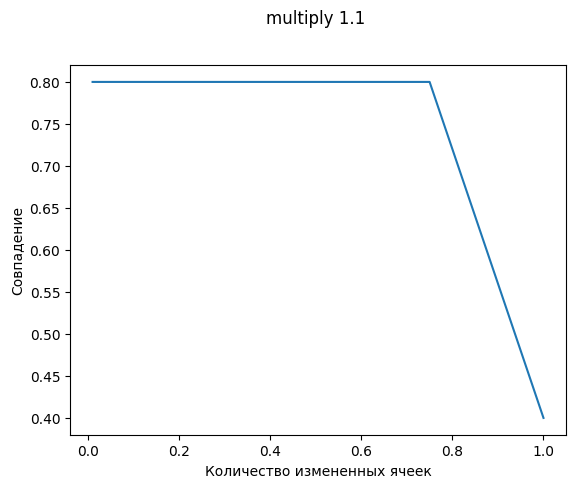

In [31]:
plt.plot(procent_list, list_1dot1_value)


plt.title('multiply 1.1 ', pad=30)
plt.xlabel("Количество измененных ячеек")
plt.ylabel("Совпадение")

plt.show()

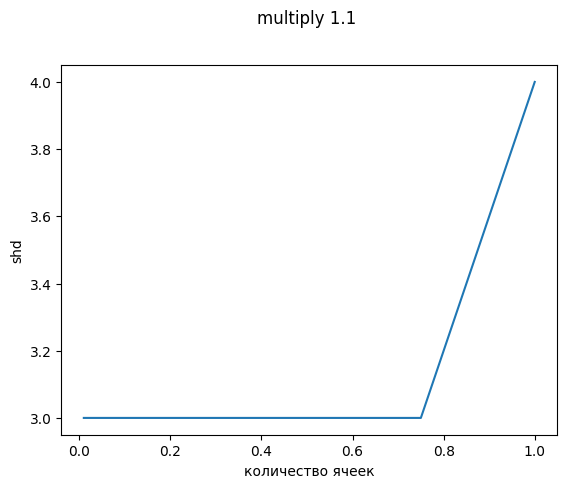

In [36]:
plt.plot(procent_list, list_1dot1_shd)


plt.title('multiply 1.1 ', pad=30)
plt.xlabel("количество ячеек")
plt.ylabel("shd")

plt.show()

In [33]:
list_1dot25_value=[]
list_1dot25_shd=[]

for procent in procent_list:
    value_1, shd = experement(df50, procent, 1.25, 's9')
    list_1dot25_value.append(value_1)
    list_1dot25_shd.append(shd)

2023-05-28 19:46:00,668 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

2023-05-28 19:46:44,885 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

2023-05-28 19:47:23,883 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

2023-05-28 19:48:04,948 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

2023-05-28 19:48:49,961 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

2023-05-28 19:49:36,173 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

2023-05-28 19:50:21,944 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [34]:
list_1dot25_value

[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.4]

In [35]:
list_1dot25_shd

[3, 3, 3, 3, 3, 3, 4]

In [38]:
list_2_value=[]
list_2_shd=[]

for procent in procent_list:
    value_1, shd = experement(df50, procent, 2, 's9')
    list_2_value.append(value_1)
    list_2_shd.append(shd)

2
2023-05-28 20:00:14,241 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-28 20:00:54,798 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-28 20:01:35,244 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

60
2023-05-28 20:02:16,200 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-28 20:02:57,070 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

181
2023-05-28 20:03:37,113 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-28 20:04:17,995 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [39]:
list_2_value

[0.0, 0.0, 0.0, 0.0, 0.8, 0.6, 1.0]

In [40]:
list_2_shd

[7, 9, 10, 6, 6, 3, 0]

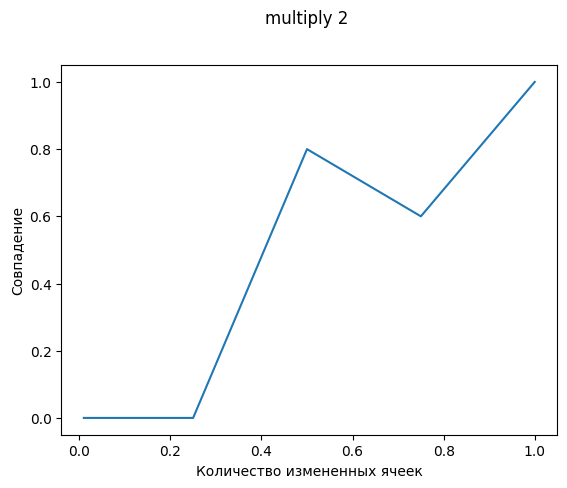

In [41]:
plt.plot(procent_list, list_2_value)


plt.title('multiply 2 ', pad=30)
plt.xlabel("Количество измененных ячеек")
plt.ylabel("Совпадение")

plt.show()

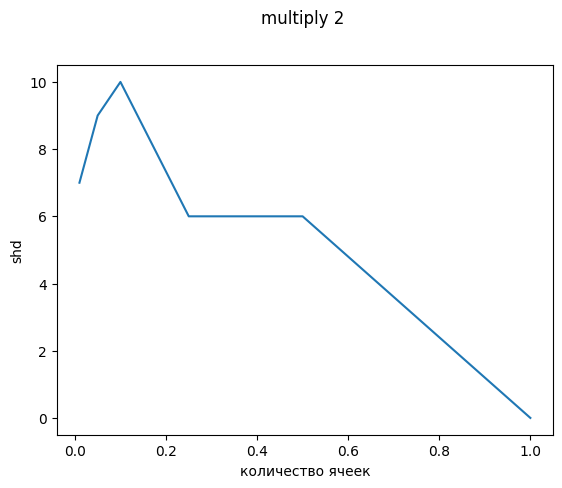

In [42]:
plt.plot(procent_list, list_2_shd)


plt.title('multiply 2 ', pad=30)
plt.xlabel("количество ячеек")
plt.ylabel("shd")

plt.show()

In [43]:
list_10_value=[]
list_10_shd=[]

for procent in procent_list:
    value_1, shd = experement(df50, procent, 10, 's9')
    list_10_value.append(value_1)
    list_10_shd.append(shd)

2
2023-05-28 20:09:51,984 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-28 20:10:32,111 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-28 20:11:12,614 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

60
2023-05-28 20:11:53,551 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-28 20:12:34,837 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

181
2023-05-28 20:13:15,577 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-28 20:13:56,218 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

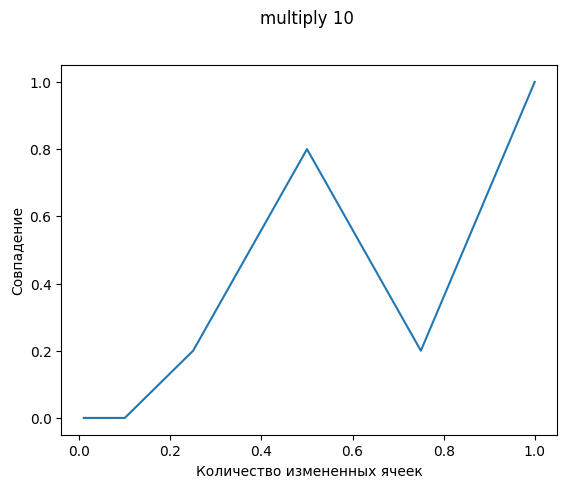

In [44]:
plt.plot(procent_list, list_10_value)


plt.title('multiply 10 ', pad=30)
plt.xlabel("Количество измененных ячеек")
plt.ylabel("Совпадение")

plt.show()

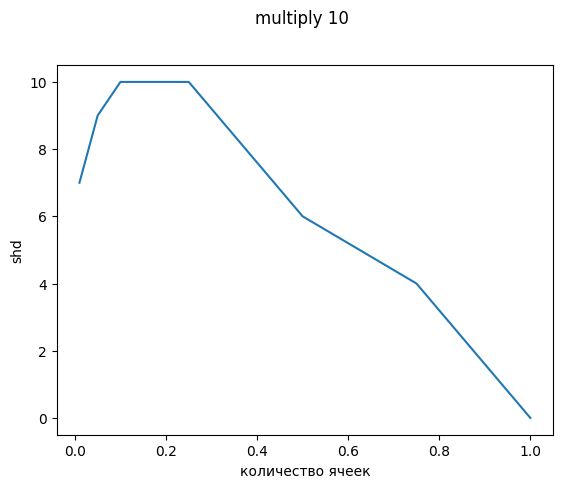

In [45]:
plt.plot(procent_list, list_10_shd)


plt.title('multiply 10 ', pad=30)
plt.xlabel("количество ячеек")
plt.ylabel("shd")

plt.show()

In [46]:
list_100_value=[]
list_100_shd=[]

for procent in procent_list:
    value_1, shd = experement(df50, procent, 100, 's9')
    list_100_value.append(value_1)
    list_100_shd.append(shd)

2
2023-05-28 20:16:47,088 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-28 20:17:28,777 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-28 20:18:09,819 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

60
2023-05-28 20:18:56,687 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-28 20:19:41,000 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

181
2023-05-28 20:20:23,999 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-28 20:21:07,548 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

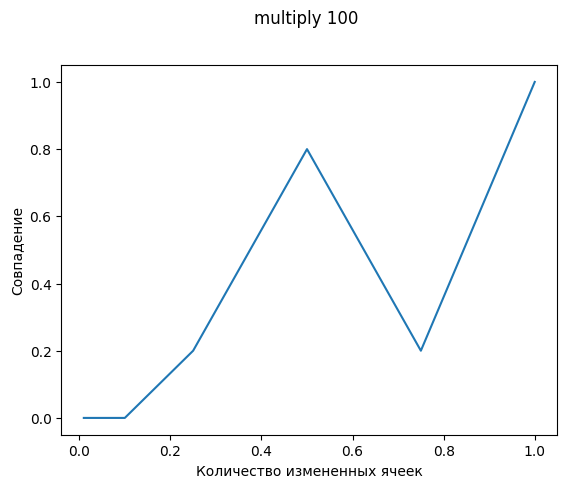

In [47]:
plt.plot(procent_list, list_100_value)


plt.title('multiply 100 ', pad=30)
plt.xlabel("Количество измененных ячеек")
plt.ylabel("Совпадение")

plt.show()

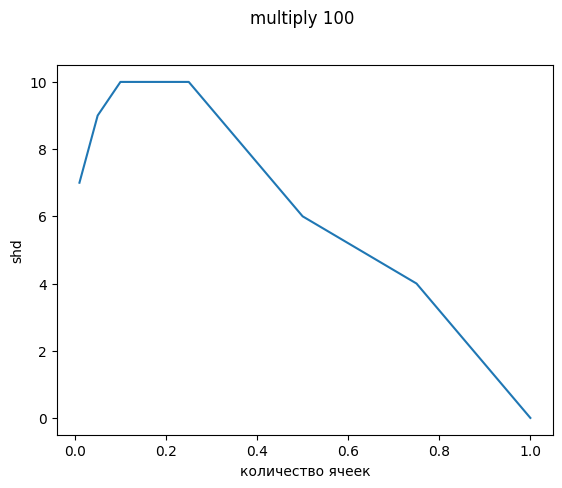

In [48]:
plt.plot(procent_list, list_100_shd)


plt.title('multiply 100 ', pad=30)
plt.xlabel("количество ячеек")
plt.ylabel("shd")

plt.show()

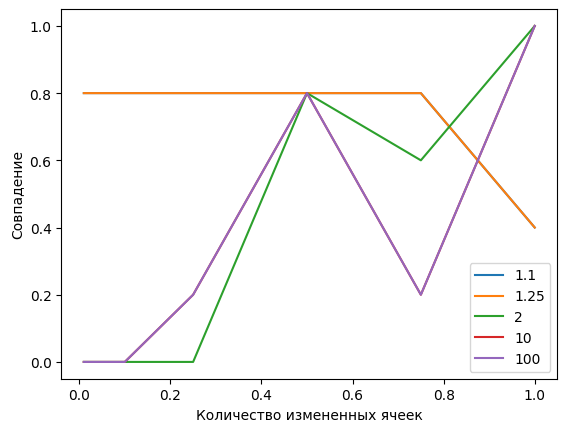

In [50]:
plt.plot(procent_list, list_1dot1_value, label = "1.1")
plt.plot(procent_list, list_1dot25_value, label = "1.25")
plt.plot(procent_list, list_2_value, label = "2")
plt.plot(procent_list, list_10_value, label = "10")
plt.plot(procent_list, list_100_value, label = "100")
#plt.title('multiply 1.1 ', pad=30)
plt.xlabel("Количество измененных ячеек")
plt.ylabel("Совпадение")
plt.legend()
plt.show()

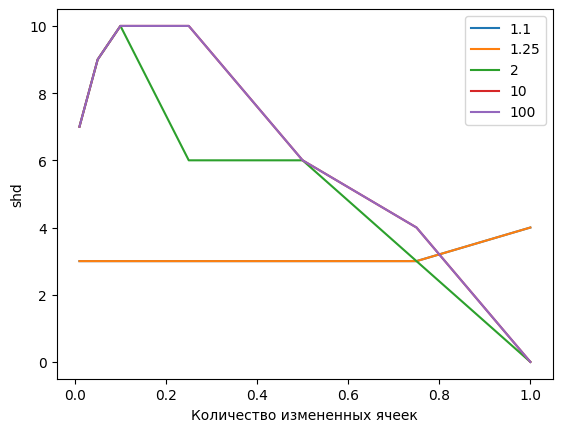

In [51]:
plt.plot(procent_list, list_1dot1_shd, label = "1.1")
plt.plot(procent_list, list_1dot25_shd, label = "1.25")
plt.plot(procent_list, list_2_shd, label = "2")
plt.plot(procent_list, list_10_shd, label = "10")
plt.plot(procent_list, list_100_shd, label = "100")
#plt.title('multiply 1.1 ', pad=30)
plt.xlabel("Количество измененных ячеек")
plt.ylabel("shd")
plt.legend()
plt.show()

## Главное

In [103]:
def experement3(df, procent, znachenie, sektor):
    
    df1=df.copy()
    
    kol_cells=round(procent*df50.shape[0])
    
    
    print(kol_cells)
    
    #for i in range(0,kol_cells):
        #df1.at[i, sektor] = znachenie
    df1.loc[:kol_cells, sektor] *=znachenie
    
    df1=df1.round(6)

    discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

    p = pp.Preprocessor([('discretizer', discretizer)])
    discretized_data , est = p.apply(df1)

    info = p.info
    
    bn_d = Nets.ContinuousBN(use_mixture=True)
    
    bn_d.add_nodes(descriptor=info)
    bn_d.add_edges(data=discretized_data, scoring_function=('K2',K2Score))
    
    

    mark_orig= mark (bn_d_orig,sektor)
    mark_test= mark (bn_d,sektor)
    
    value_1, value_2= comparasion (mark_orig,mark_test)
    
    shd=precision_recall(mark_test,mark_orig)
    
    
    list_vse_uzly=[]
    list_vse_uzly_shd=[]
    
    for i in range(0,len(bn_d_orig.nodes)):
        
        mark_orig111= mark (bn_d_orig,f's{i}')
        mark_test111= mark (bn_d,f's{i}')
        
        value_111, value_222= comparasion (mark_orig111,mark_test111)
        list_vse_uzly.append(value_111)
        shd111=precision_recall(mark_test111,mark_orig111)
        list_vse_uzly_shd.append(shd111)
    
    return value_1, shd,list_vse_uzly,list_vse_uzly_shd

In [104]:
list_1dot05_value_round=[]
list_1dot05_shd_round=[]
list_1dot05_value_vse_uzly_round=[]
list_1dot05_shd_vse_uzly_round=[]


for procent in procent_list:
    value_1, shd,list_vse_uzly,list_vse_uzly_shd = experement3(df50, procent, 1.05, 's9')
    list_1dot05_value_round.append(value_1)
    list_1dot05_shd_round.append(shd)
    list_1dot05_value_vse_uzly_round.append(list_vse_uzly)
    list_1dot05_shd_vse_uzly_round.append(list_vse_uzly_shd)

2
2023-05-28 23:52:45,553 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-28 23:53:22,387 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-28 23:53:59,428 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

48
2023-05-28 23:54:36,232 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

72
2023-05-28 23:55:12,558 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

96
2023-05-28 23:55:48,986 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-28 23:56:25,466 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

145
2023-05-28 23:57:03,462 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

169
2023-05-28 23:57:42,804 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

193
2023-05-28 23:58:21,739 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

217
2023-05-28 23:58:59,466 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-28 23:59:35,971 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [107]:
list_1dot05_value_vse_uzly_round_array=np.array(list_1dot05_value_vse_uzly_round)

In [115]:
list_1dot05_shd_vse_uzly_round_array=np.array(list_1dot05_shd_vse_uzly_round)

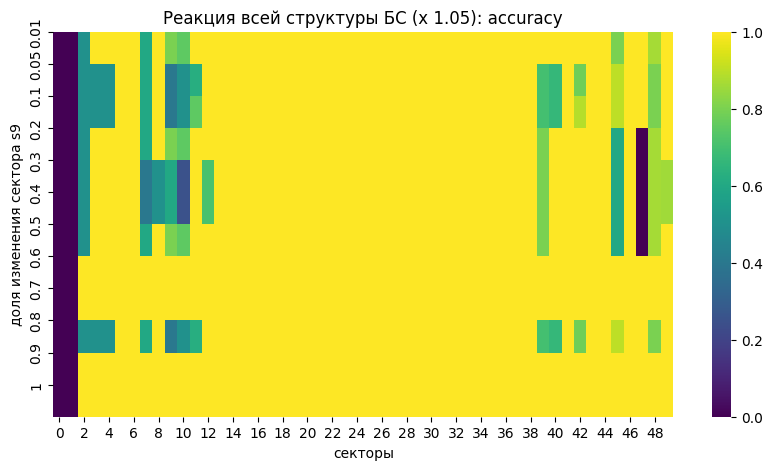

In [168]:

plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_1dot05_value_vse_uzly_round_array , cmap = 'viridis' )
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 1.05): accuracy" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

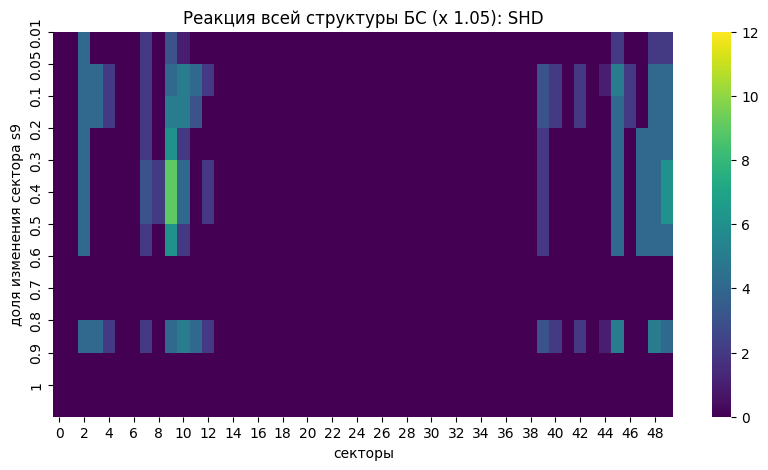

In [167]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_1dot05_shd_vse_uzly_round_array , cmap = 'viridis' ,vmax=12)
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 1.05): SHD" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

In [117]:
list_1dot1_value_round=[]
list_1dot1_shd_round=[]
list_1dot1_value_vse_uzly_round=[]
list_1dot1_shd_vse_uzly_round=[]


for procent in procent_list:
    value_1, shd,list_vse_uzly,list_vse_uzly_shd = experement3(df50, procent, 1.1, 's9')
    list_1dot1_value_round.append(value_1)
    list_1dot1_shd_round.append(shd)
    list_1dot1_value_vse_uzly_round.append(list_vse_uzly)
    list_1dot1_shd_vse_uzly_round.append(list_vse_uzly_shd)
    
list_1dot1_value_vse_uzly_round_array=np.array(list_1dot1_value_vse_uzly_round)
list_1dot1_shd_vse_uzly_round_array=np.array(list_1dot1_shd_vse_uzly_round)

2
2023-05-29 00:33:43,270 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-29 00:34:22,538 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-29 00:35:02,210 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

48
2023-05-29 00:35:41,603 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

72
2023-05-29 00:36:21,021 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

96
2023-05-29 00:37:00,183 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-29 00:37:38,412 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

145
2023-05-29 00:38:17,028 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

169
2023-05-29 00:38:55,203 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

193
2023-05-29 00:39:33,131 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

217
2023-05-29 00:40:11,618 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-29 00:40:52,792 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

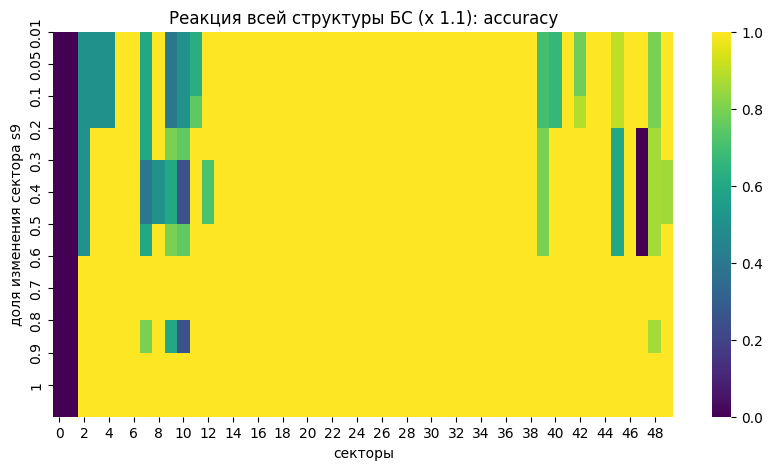

In [169]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_1dot1_value_vse_uzly_round_array , cmap = 'viridis' )
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 1.1): accuracy" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

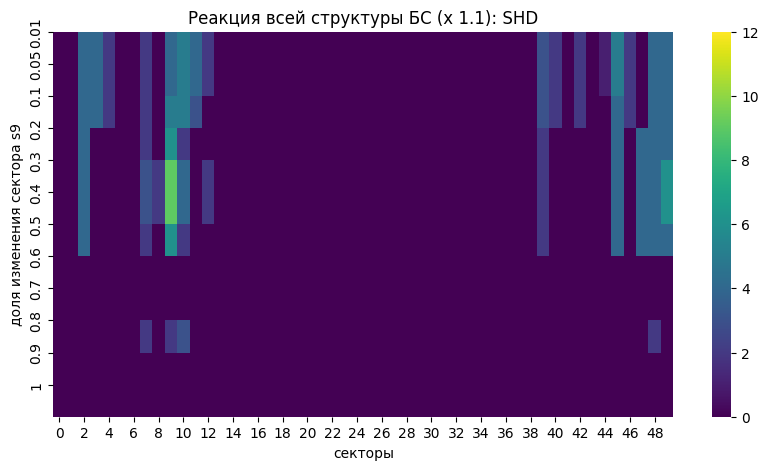

In [166]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_1dot1_shd_vse_uzly_round_array , cmap = 'viridis',vmax=12 )
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 1.1): SHD" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

In [118]:
list_1dot25_value_round=[]
list_1dot25_shd_round=[]
list_1dot25_value_vse_uzly_round=[]
list_1dot25_shd_vse_uzly_round=[]


for procent in procent_list:
    value_1, shd,list_vse_uzly,list_vse_uzly_shd = experement3(df50, procent, 1.25, 's9')
    list_1dot25_value_round.append(value_1)
    list_1dot25_shd_round.append(shd)
    list_1dot25_value_vse_uzly_round.append(list_vse_uzly)
    list_1dot25_shd_vse_uzly_round.append(list_vse_uzly_shd)
    
list_1dot25_value_vse_uzly_round_array=np.array(list_1dot25_value_vse_uzly_round)
list_1dot25_shd_vse_uzly_round_array=np.array(list_1dot25_shd_vse_uzly_round)

2
2023-05-29 00:41:38,286 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-29 00:42:21,444 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-29 00:43:06,052 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

48
2023-05-29 00:43:49,638 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

72
2023-05-29 00:44:32,831 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

96
2023-05-29 00:45:15,280 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-29 00:45:58,849 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

145
2023-05-29 00:46:44,290 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

169
2023-05-29 00:47:28,156 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

193
2023-05-29 00:48:12,481 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

217
2023-05-29 00:48:50,968 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-29 00:49:29,393 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

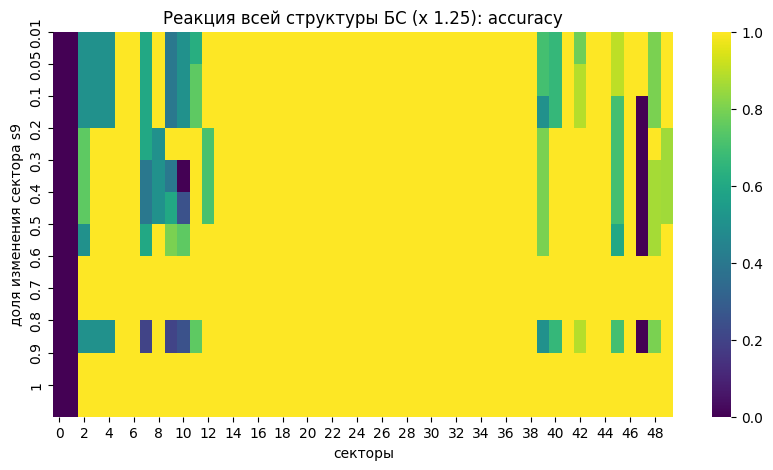

In [170]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_1dot25_value_vse_uzly_round_array , cmap = 'viridis' )
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 1.25): accuracy" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

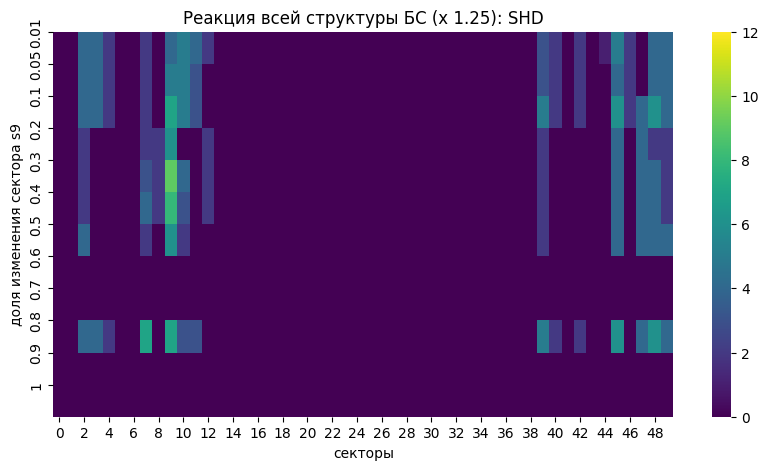

In [165]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_1dot25_shd_vse_uzly_round_array , cmap = 'viridis' ,vmax=12)
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 1.25): SHD" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

In [119]:
list_1dot5_value_round=[]
list_1dot5_shd_round=[]
list_1dot5_value_vse_uzly_round=[]
list_1dot5_shd_vse_uzly_round=[]


for procent in procent_list:
    value_1, shd,list_vse_uzly,list_vse_uzly_shd = experement3(df50, procent, 1.5, 's9')
    list_1dot5_value_round.append(value_1)
    list_1dot5_shd_round.append(shd)
    list_1dot5_value_vse_uzly_round.append(list_vse_uzly)
    list_1dot5_shd_vse_uzly_round.append(list_vse_uzly_shd)
    
list_1dot5_value_vse_uzly_round_array=np.array(list_1dot5_value_vse_uzly_round)
list_1dot5_shd_vse_uzly_round_array=np.array(list_1dot5_shd_vse_uzly_round)

2
2023-05-29 00:50:07,654 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-29 00:50:46,058 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-29 00:51:24,693 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

48
2023-05-29 00:52:02,846 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

72
2023-05-29 00:52:43,090 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

96
2023-05-29 00:53:23,223 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-29 00:54:03,886 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

145
2023-05-29 00:54:44,609 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

169
2023-05-29 00:55:25,725 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

193
2023-05-29 00:56:07,374 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

217
2023-05-29 00:56:48,016 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-29 00:57:29,004 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

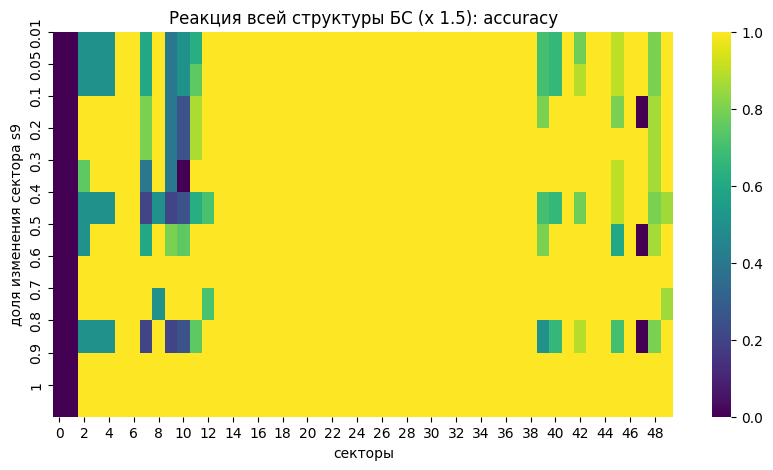

In [171]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_1dot5_value_vse_uzly_round_array , cmap = 'viridis' )
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 1.5): accuracy" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

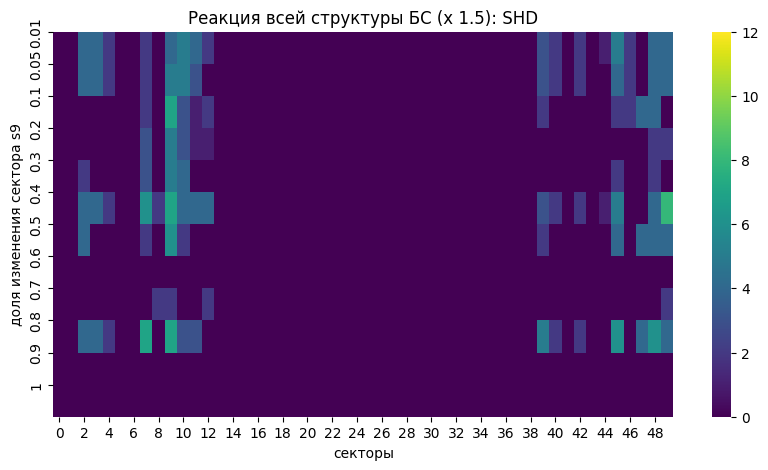

In [164]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_1dot5_shd_vse_uzly_round_array , cmap = 'viridis',vmax=12 )
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 1.5): SHD" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

In [120]:
list_2_value_round=[]
list_2_shd_round=[]
list_2_value_vse_uzly_round=[]
list_2_shd_vse_uzly_round=[]


for procent in procent_list:
    value_1, shd,list_vse_uzly,list_vse_uzly_shd = experement3(df50, procent, 2, 's9')
    list_2_value_round.append(value_1)
    list_2_shd_round.append(shd)
    list_2_value_vse_uzly_round.append(list_vse_uzly)
    list_2_shd_vse_uzly_round.append(list_vse_uzly_shd)
    
list_2_value_vse_uzly_round_array=np.array(list_2_value_vse_uzly_round)
list_2_shd_vse_uzly_round_array=np.array(list_2_shd_vse_uzly_round)

2
2023-05-29 00:58:09,886 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-29 00:58:49,912 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-29 00:59:30,635 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

48
2023-05-29 01:00:11,709 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

72
2023-05-29 01:00:52,157 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

96
2023-05-29 01:01:33,371 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-29 01:02:12,287 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

145
2023-05-29 01:02:50,786 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

169
2023-05-29 01:03:29,310 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

193
2023-05-29 01:04:08,586 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

217
2023-05-29 01:04:47,108 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-29 01:05:26,067 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

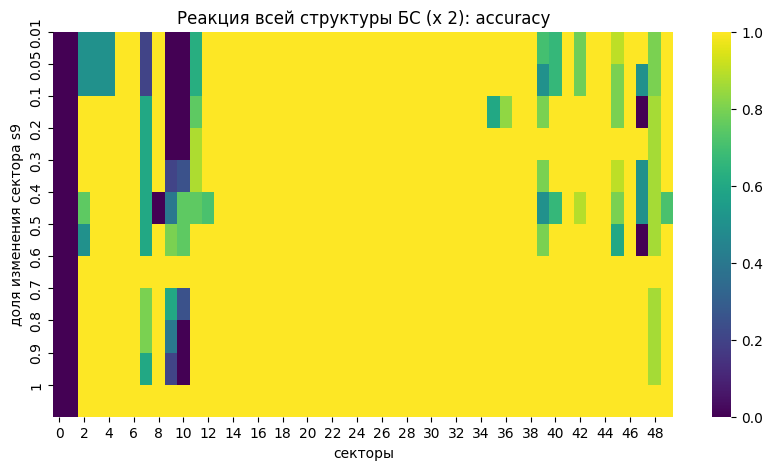

In [172]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_2_value_vse_uzly_round_array , cmap = 'viridis' )
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 2): accuracy" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

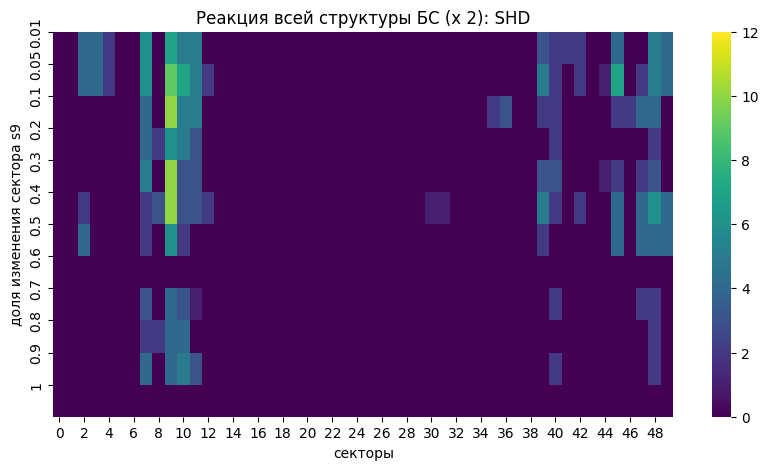

In [163]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_2_shd_vse_uzly_round_array , cmap = 'viridis',vmax=12)
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 2): SHD" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

In [121]:
list_10_value_round=[]
list_10_shd_round=[]
list_10_value_vse_uzly_round=[]
list_10_shd_vse_uzly_round=[]


for procent in procent_list:
    value_1, shd,list_vse_uzly,list_vse_uzly_shd = experement3(df50, procent, 10, 's9')
    list_10_value_round.append(value_1)
    list_10_shd_round.append(shd)
    list_10_value_vse_uzly_round.append(list_vse_uzly)
    list_10_shd_vse_uzly_round.append(list_vse_uzly_shd)
    
list_10_value_vse_uzly_round_array=np.array(list_10_value_vse_uzly_round)
list_10_shd_vse_uzly_round_array=np.array(list_10_shd_vse_uzly_round)

2
2023-05-29 01:06:04,566 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-29 01:06:42,571 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-29 01:07:20,664 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

48
2023-05-29 01:07:59,639 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

72
2023-05-29 01:08:38,226 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

96
2023-05-29 01:09:19,082 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-29 01:10:00,186 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

145
2023-05-29 01:10:40,409 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

169
2023-05-29 01:11:21,041 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

193
2023-05-29 01:12:01,437 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

217
2023-05-29 01:12:42,978 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-29 01:13:24,426 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

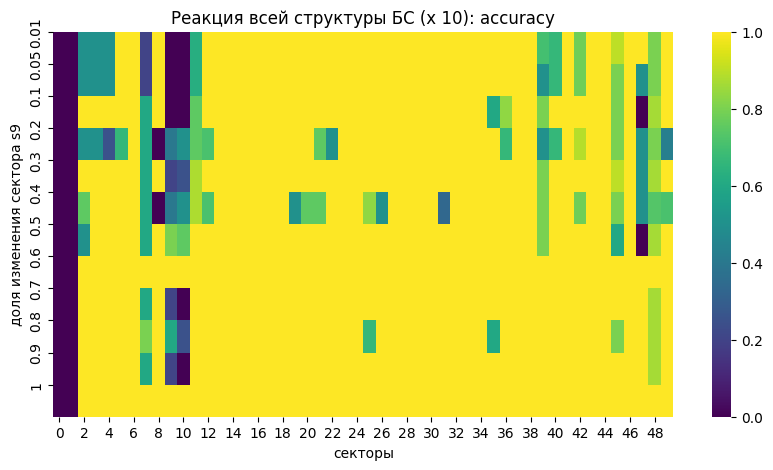

In [173]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_10_value_vse_uzly_round_array , cmap = 'viridis' )
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 10): accuracy" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

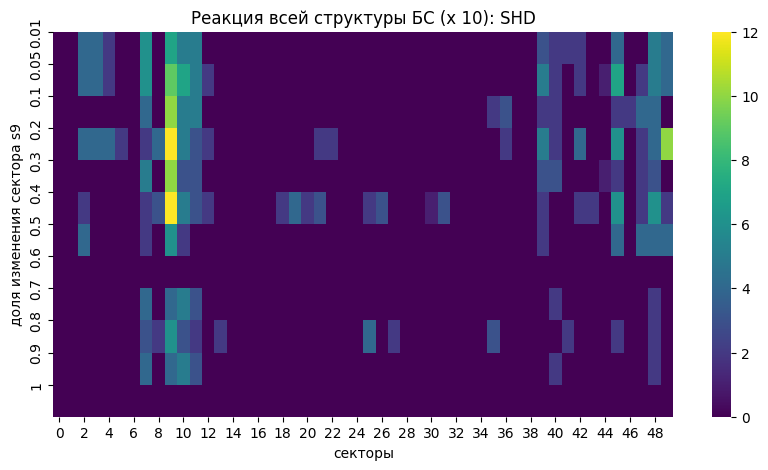

In [162]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_10_shd_vse_uzly_round_array , cmap = 'viridis',vmax=12 )
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 10): SHD" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

In [122]:
list_100_value_round=[]
list_100_shd_round=[]
list_100_value_vse_uzly_round=[]
list_100_shd_vse_uzly_round=[]


for procent in procent_list:
    value_1, shd,list_vse_uzly,list_vse_uzly_shd = experement3(df50, procent, 100, 's9')
    list_100_value_round.append(value_1)
    list_100_shd_round.append(shd)
    list_100_value_vse_uzly_round.append(list_vse_uzly)
    list_100_shd_vse_uzly_round.append(list_vse_uzly_shd)
    
list_100_value_vse_uzly_round_array=np.array(list_100_value_vse_uzly_round)
list_100_shd_vse_uzly_round_array=np.array(list_100_shd_vse_uzly_round)

2
2023-05-29 01:14:04,929 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-29 01:14:45,808 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-29 01:15:26,679 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

48
2023-05-29 01:16:07,622 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

72
2023-05-29 01:16:48,638 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

96
2023-05-29 01:17:29,513 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-29 01:18:12,803 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

145
2023-05-29 01:18:55,156 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

169
2023-05-29 01:19:38,098 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

193
2023-05-29 01:20:20,559 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

217
2023-05-29 01:21:03,407 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-29 01:21:46,443 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

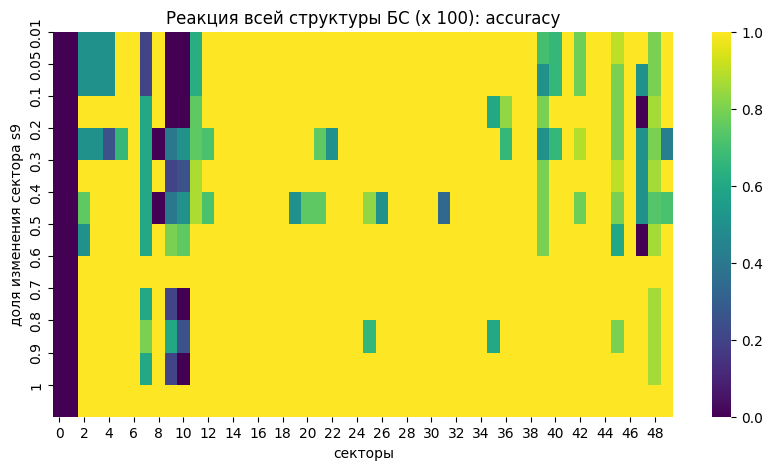

In [174]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_100_value_vse_uzly_round_array , cmap = 'viridis' )
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 100): accuracy" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

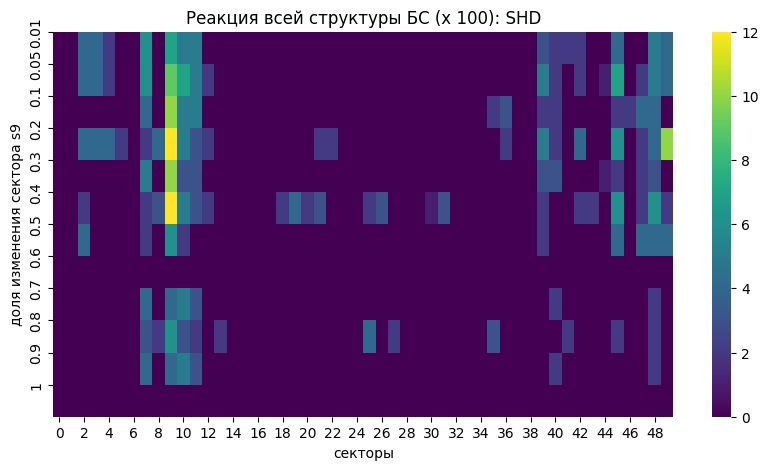

In [161]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_100_shd_vse_uzly_round_array , cmap = 'viridis',vmax=12)
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 100): SHD" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

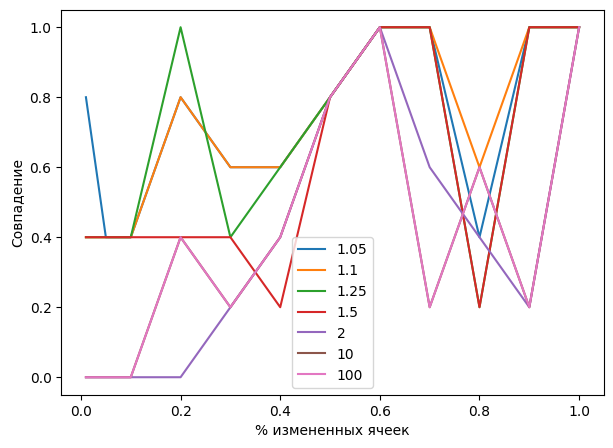

In [123]:
plt.plot(procent_list, list_1dot05_value_round, label = "1.05")
plt.plot(procent_list, list_1dot1_value_round, label = "1.1")
plt.plot(procent_list, list_1dot25_value_round, label = "1.25")
plt.plot(procent_list, list_1dot5_value_round, label = "1.5")
plt.plot(procent_list, list_2_value_round, label = "2")
plt.plot(procent_list, list_10_value_round, label = "10")
plt.plot(procent_list, list_100_value_round, label = "100")

#plt.title('multiply 1.1 ', pad=30)
plt.xlabel("% измененных ячеек")
plt.ylabel("Совпадение")
plt.legend()
plt.show()

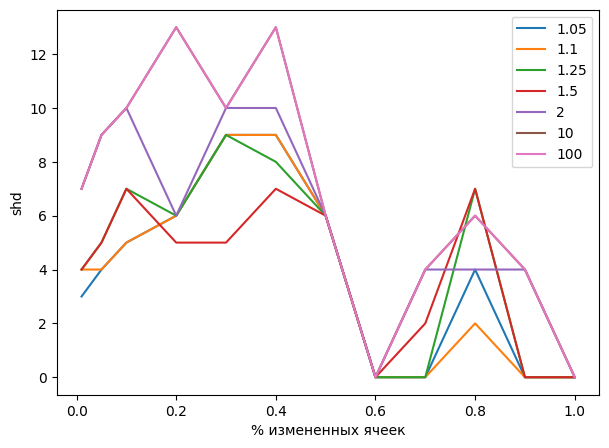

In [125]:
plt.plot(procent_list, list_1dot05_shd_round, label = "1.05")
plt.plot(procent_list, list_1dot1_shd_round, label = "1.1")
plt.plot(procent_list, list_1dot25_shd_round, label = "1.25")
plt.plot(procent_list, list_1dot5_shd_round, label = "1.5")
plt.plot(procent_list, list_2_shd_round, label = "2")
plt.plot(procent_list, list_10_shd_round, label = "10")
plt.plot(procent_list, list_100_shd_round, label = "100")

#plt.title('multiply 1.1 ', pad=30)
plt.xlabel("% измененных ячеек")
plt.ylabel("shd")
plt.legend()
plt.show()

In [ ]:
list_1dot05_value_vse_uzly_round_array

In [153]:
np.savetxt("list_1dot05_value_vse_uzly_round_array.csv", list_1dot05_value_vse_uzly_round_array, delimiter=",")
np.savetxt("list_1dot05_shd_vse_uzly_round_array.csv", list_1dot05_shd_vse_uzly_round_array, delimiter=",")

In [154]:
np.savetxt("list_1dot1_value_vse_uzly_round_array.csv", list_1dot1_value_vse_uzly_round_array, delimiter=",")
np.savetxt("list_1dot1_shd_vse_uzly_round_array.csv", list_1dot1_shd_vse_uzly_round_array, delimiter=",")

In [155]:
np.savetxt("list_1dot25_value_vse_uzly_round_array.csv", list_1dot25_value_vse_uzly_round_array, delimiter=",")
np.savetxt("list_1dot25_shd_vse_uzly_round_array.csv", list_1dot25_shd_vse_uzly_round_array, delimiter=",")

In [156]:
np.savetxt("list_1dot5_value_vse_uzly_round_array.csv", list_1dot5_value_vse_uzly_round_array, delimiter=",")
np.savetxt("list_1dot5_shd_vse_uzly_round_array.csv", list_1dot5_shd_vse_uzly_round_array, delimiter=",")

In [157]:
np.savetxt("list_2_value_vse_uzly_round_array.csv", list_2_value_vse_uzly_round_array, delimiter=",")
np.savetxt("list_2_shd_vse_uzly_round_array.csv", list_2_shd_vse_uzly_round_array, delimiter=",")

In [158]:
np.savetxt("list_10_value_vse_uzly_round_array.csv", list_10_value_vse_uzly_round_array, delimiter=",")
np.savetxt("list_10_shd_vse_uzly_round_array.csv", list_10_shd_vse_uzly_round_array, delimiter=",")

In [159]:
np.savetxt("list_100_value_vse_uzly_round_array.csv", list_100_value_vse_uzly_round_array, delimiter=",")
np.savetxt("list_100_shd_vse_uzly_round_array.csv", list_100_shd_vse_uzly_round_array, delimiter=",")

## Kmeans


In [84]:
def experement4(df, procent, znachenie, sektor):
    
    df1=df.copy()
    
    kol_cells=round(procent*df50.shape[0])
    
    print(kol_cells)
    
    #for i in range(0,kol_cells):
        #df1.at[i, sektor] = znachenie
    df1.loc[:kol_cells, sektor] *=znachenie
    
    df1=df1.round(6)

    discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

    p = pp.Preprocessor([('discretizer', discretizer)])
    discretized_data , est = p.apply(df1)

    info = p.info
    
    bn_d = Nets.ContinuousBN(use_mixture=True)
    
    bn_d.add_nodes(descriptor=info)
    bn_d.add_edges(data=discretized_data, scoring_function=('K2',K2Score))
    
    

    mark_orig= mark (bn_d_orig,sektor)
    mark_test= mark (bn_d,sektor)
    
    value_1, value_2= comparasion (mark_orig,mark_test)
    
    shd=precision_recall(mark_test,mark_orig)
    
    
    
    return value_1, shd



In [85]:
list_1dot1_value_round_un=[]
list_1dot1_shd_round_un=[]

for procent in procent_list:
    value_1, shd = experement4(df50, procent, 1.1, 's9')
    list_1dot1_value_round_un.append(value_1)
    list_1dot1_shd_round_un.append(shd)


2
2023-05-28 22:24:26,469 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-28 22:25:08,853 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-28 22:25:49,890 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

60
2023-05-28 22:26:33,547 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-28 22:27:15,630 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

181
2023-05-28 22:27:56,686 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-28 22:28:37,473 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [86]:
list_1dot25_value_round_un=[]
list_1dot25_shd_round_un=[]

for procent in procent_list:
    value_1, shd = experement4(df50, procent, 1.25, 's9')
    list_1dot25_value_round_un.append(value_1)
    list_1dot25_shd_round_un.append(shd)

2
2023-05-28 22:29:15,828 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-28 22:29:55,192 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-28 22:30:36,821 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

60
2023-05-28 22:31:19,121 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-28 22:32:01,629 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

181
2023-05-28 22:32:44,393 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-28 22:33:26,372 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [87]:
list_2_value_round_un=[]
list_2_shd_round_un=[]

for procent in procent_list:
    value_1, shd = experement4(df50, procent, 2, 's9')
    list_2_value_round_un.append(value_1)
    list_2_shd_round_un.append(shd)

2
2023-05-28 22:34:08,214 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-28 22:34:50,836 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-28 22:35:33,680 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

60
2023-05-28 22:36:16,281 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-28 22:36:58,414 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

181
2023-05-28 22:37:41,447 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-28 22:38:23,545 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [88]:
list_10_value_round_un=[]
list_10_shd_round_un=[]

for procent in procent_list:
    value_1, shd = experement4(df50, procent, 10, 's9')
    list_10_value_round_un.append(value_1)
    list_10_shd_round_un.append(shd)

2
2023-05-28 22:39:05,628 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-28 22:39:45,874 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-28 22:40:23,781 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

60
2023-05-28 22:41:02,652 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-28 22:41:40,990 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

181
2023-05-28 22:42:19,444 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-28 22:42:58,207 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

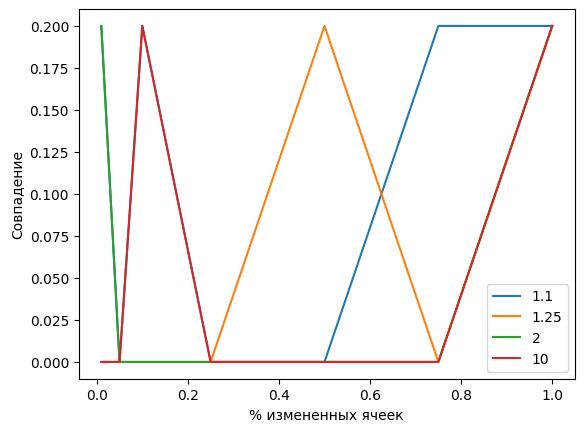

In [89]:
plt.plot(procent_list, list_1dot1_value_round_un, label = "1.1")
plt.plot(procent_list, list_1dot25_value_round_un, label = "1.25")
plt.plot(procent_list, list_2_value_round_un, label = "2")
plt.plot(procent_list, list_10_value_round_un, label = "10")

#plt.title('multiply 1.1 ', pad=30)
plt.xlabel("% измененных ячеек")
plt.ylabel("Совпадение")
plt.legend()
plt.show()

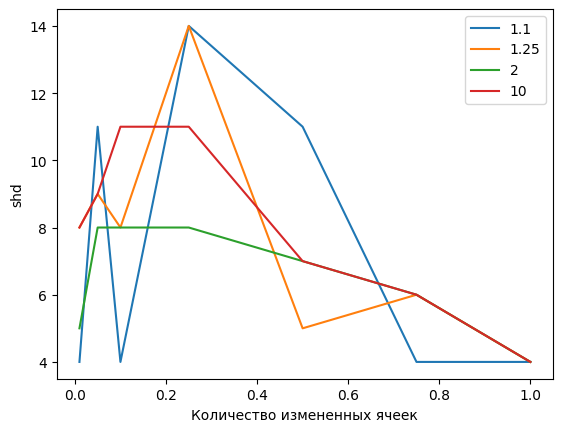

In [90]:
plt.plot(procent_list, list_1dot1_shd_round_un, label = "1.1")
plt.plot(procent_list, list_1dot25_shd_round_un, label = "1.25")
plt.plot(procent_list, list_2_shd_round_un, label = "2")
plt.plot(procent_list, list_10_shd_round_un, label = "10")

#plt.title('multiply 1.1 ', pad=30)
plt.xlabel("Количество измененных ячеек")
plt.ylabel("shd")
plt.legend()
plt.show()

## Зашумленные данные

In [18]:
def experement5(df, procent, znachenie, sektor):
    
    df1=df.copy()
    
    for i1 in range(0,30):
    
        df1.iloc[i1, :] = df1.iloc[i1, :]*1.02
        df1.iloc[:, i1] = df1.iloc[:, i1]*1.01
    
    kol_cells=round(procent*df50.shape[0])
    
    
    print(kol_cells)
    
    #for i in range(0,kol_cells):
        #df1.at[i, sektor] = znachenie
    df1.loc[:kol_cells, sektor] *=znachenie
    
    df1=df1.round(6)

    discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

    p = pp.Preprocessor([('discretizer', discretizer)])
    discretized_data , est = p.apply(df1)

    info = p.info
    
    bn_d = Nets.ContinuousBN(use_mixture=True)
    
    bn_d.add_nodes(descriptor=info)
    bn_d.add_edges(data=discretized_data, scoring_function=('K2',K2Score))
    
    

    mark_orig= mark (bn_d_orig,sektor)
    mark_test= mark (bn_d,sektor)
    
    value_1, value_2= comparasion (mark_orig,mark_test)
    
    shd=precision_recall(mark_test,mark_orig)
    
    
    list_vse_uzly=[]
    list_vse_uzly_shd=[]
    
    for i in range(0,len(bn_d_orig.nodes)):
        
        mark_orig111= mark (bn_d_orig,f's{i}')
        mark_test111= mark (bn_d,f's{i}')
        
        value_111, value_222= comparasion (mark_orig111,mark_test111)
        list_vse_uzly.append(value_111)
        shd111=precision_recall(mark_test111,mark_orig111)
        list_vse_uzly_shd.append(shd111)
    
    return value_1, shd,list_vse_uzly,list_vse_uzly_shd

In [20]:
list_100_value_drug=[]
list_100_shd_drug=[]
list_100_value_vse_uzly_drug=[]
list_100_shd_vse_uzly_drug=[]


for procent in procent_list:
    value_1, shd,list_vse_uzly,list_vse_uzly_shd = experement5(df50, procent, 100, 's9')
    list_100_value_drug.append(value_1)
    list_100_shd_drug.append(shd)
    list_100_value_vse_uzly_drug.append(list_vse_uzly)
    list_100_shd_vse_uzly_drug.append(list_vse_uzly_shd)
    


2
2023-05-30 19:47:03,918 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

12
2023-05-30 19:47:43,161 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

24
2023-05-30 19:48:22,042 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

48
2023-05-30 19:49:01,075 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

72
2023-05-30 19:49:40,497 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

96
2023-05-30 19:50:19,310 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

120
2023-05-30 19:50:59,490 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

145
2023-05-30 19:51:38,753 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

169
2023-05-30 19:52:17,886 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

193
2023-05-30 19:52:56,823 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

217
2023-05-30 19:53:35,442 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

241
2023-05-30 19:54:14,528 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [21]:
list_100_value_vse_uzly_drug_array=np.array(list_100_value_vse_uzly_drug)
list_100_shd_vse_uzly_drug_array=np.array(list_100_shd_vse_uzly_drug)

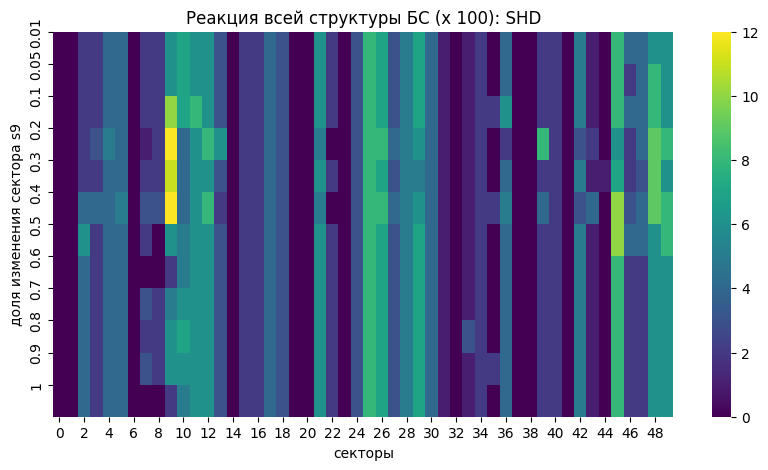

In [22]:
plt.rcParams["figure.figsize"]=(10,5)
# Generating data for the heat map
data = np.random.rand( 10 , 10 )

# Function to show the heat map
ax = sns.heatmap( list_100_shd_vse_uzly_drug_array , cmap = 'viridis',vmax=12)
  
# Adding details to the plot
plt.title( "Реакция всей структуры БС (x 100): SHD" )
plt.xlabel('секторы')
plt.ylabel('доля изменения сектора s9')

ax.set_yticks(np.arange(len(procent_list)), labels=procent_list)
# Displaying the plot
plt.show()

In [16]:
df1=df50.copy()
for i in range(0,30):
    
    df1.iloc[i, :] = df1.iloc[i, :]*1.02
    df1.iloc[:, i] = df1.iloc[:, i]*1.01

In [17]:
df1

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49
0,0.0,0.0,0.002732,0.049600,0.053739,0.032257,0.061090,0.035719,0.008835,0.013903,...,0.060303,0.069416,0.047178,0.031632,0.022465,0.018178,0.025504,0.029048,0.039849,0.022582
1,0.0,0.0,0.000796,0.044314,0.056839,0.032914,0.062101,0.036452,0.009499,0.014161,...,0.065794,0.068342,0.047764,0.032929,0.021449,0.017936,0.025469,0.029493,0.039866,0.023212
2,0.0,0.0,0.002201,0.048755,0.054423,0.032211,0.061973,0.037547,0.009573,0.014415,...,0.077823,0.074443,0.050677,0.035317,0.023435,0.018512,0.025552,0.029235,0.039840,0.023199
3,0.0,0.0,0.002192,0.052733,0.056715,0.032244,0.063440,0.038116,0.010147,0.014101,...,0.073244,0.076574,0.057866,0.038738,0.024109,0.018566,0.025362,0.029255,0.038733,0.022549
4,0.0,0.0,0.002342,0.053881,0.062873,0.035784,0.065863,0.039040,0.011493,0.014305,...,0.073572,0.074833,0.059412,0.046094,0.024774,0.019417,0.024878,0.028966,0.039428,0.024197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.0,0.000000,0.031885,0.054807,0.031314,0.054544,0.031263,0.009317,0.011775,...,0.046201,0.061782,0.043949,0.026679,0.017592,0.013303,0.017316,0.008867,0.002903,0.000000
237,0.0,0.0,0.000004,0.031959,0.055339,0.030009,0.053628,0.030534,0.009746,0.011656,...,0.045621,0.061388,0.045632,0.027437,0.018934,0.012599,0.017065,0.009032,0.002882,0.000000
238,0.0,0.0,0.000000,0.032407,0.054923,0.029524,0.053795,0.031013,0.009361,0.011392,...,0.047944,0.063717,0.045928,0.029110,0.020396,0.013223,0.017075,0.008851,0.002884,0.000000
239,0.0,0.0,0.000000,0.031032,0.053095,0.029010,0.053673,0.031165,0.009261,0.010916,...,0.054695,0.066563,0.048549,0.031198,0.019612,0.013181,0.017345,0.008904,0.002880,0.000000


##  Аномалоии в нескольких секторах

In [10]:
def experement5(df, procent, znachenie, list_sektor):
    
    df1=df.copy()
    
    kol_cells=round(procent*df50.shape[0])
    
    
    print(kol_cells)
    
    #for i in range(0,kol_cells):
        #df1.at[i, sektor] = znachenie
    
    for sektor in list_sektor:
        df1.loc[:kol_cells, sektor] *=znachenie
    
    df1=df1.round(6)

    discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

    p = pp.Preprocessor([('discretizer', discretizer)])
    discretized_data , est = p.apply(df1)

    info = p.info
    
    bn_d = Nets.ContinuousBN(use_mixture=True)
    
    bn_d.add_nodes(descriptor=info)
    bn_d.add_edges(data=discretized_data, scoring_function=('K2',K2Score))
    
    

    mark_orig= mark (bn_d_orig,sektor)
    mark_test= mark (bn_d,sektor)
    
    value_1, value_2= comparasion (mark_orig,mark_test)
    
    shd=precision_recall(mark_test,mark_orig)
    
    
    list_vse_uzly=[]
    list_vse_uzly_shd=[]
    
    for i in range(0,len(bn_d_orig.nodes)):
        
        mark_orig111= mark (bn_d_orig,f's{i}')
        mark_test111= mark (bn_d,f's{i}')
        
        value_111, value_222= comparasion (mark_orig111,mark_test111)
        list_vse_uzly.append(value_111)
        shd111=precision_recall(mark_test111,mark_orig111)
        list_vse_uzly_shd.append(shd111)
    
    return value_1, shd,list_vse_uzly,list_vse_uzly_shd

In [143]:
value_1, shd,list_vse_uzly,list_vse_uzly_shd = experement5(df50, 0.3, 1.5, ['s9'])

72
2023-06-20 22:28:06,453 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [144]:
def shd_proc (list_vse_uzly_shd):
    list_vse_uzly_shd_new = list_vse_uzly_shd.copy()

    list_vse_shd=[]
    for i in list_vse_uzly_shd_new:
        a=1-i/max(list_vse_uzly_shd)
        list_vse_shd.append(a)
    return(list_vse_shd)

In [145]:
list_vse_shd=shd_proc (list_vse_uzly_shd)

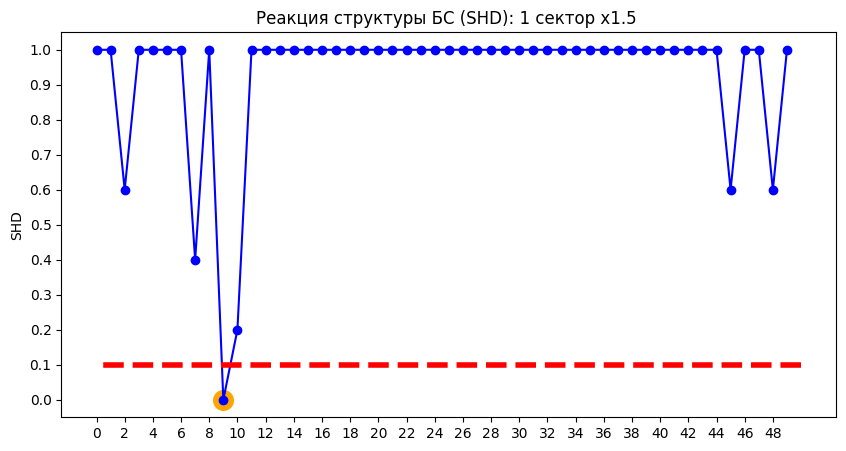

In [171]:
plt.plot(list_vse_shd, 'o-b')
plt.plot([50,0],[0.1,0.1],linestyle='dashed', color='r', linewidth=4)
plt.ylabel('SHD')
plt.xticks(range(0,50,2))
plt.yticks(np.linspace(0, 1,11))
plt.title( "Реакция структуры БС (SHD): 1 сектор x1.5 " )

X = np.array([9])
Y = np.array([list_vse_shd[X[0]]])

plt.scatter(X,Y,color="orange",s=200)

plt.show()

In [147]:
value_2, shd,list_vse_uzly2,list_vse_uzly_shd2 = experement5(df50, 0.3, 1.5, ['s9', 's20'])

72
2023-06-20 22:28:46,696 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [148]:
list_vse_shd2=shd_proc (list_vse_uzly_shd2)

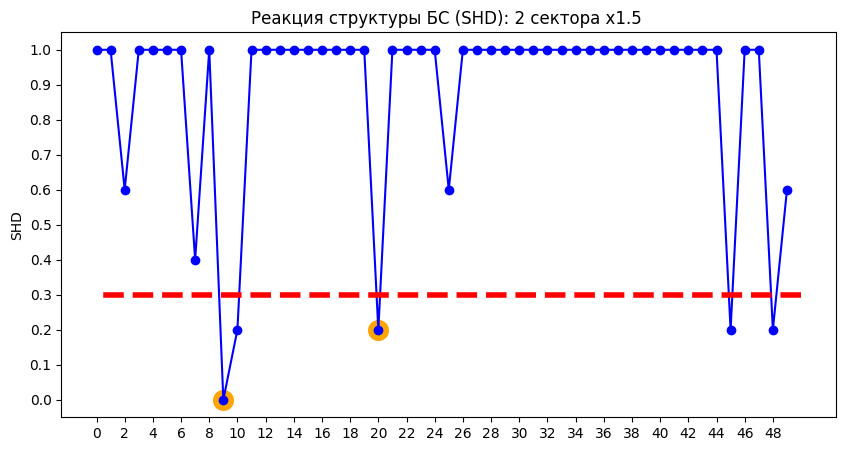

In [170]:
plt.plot(list_vse_shd2, 'o-b')
plt.plot([50,0],[0.3,0.3],linestyle='dashed', color='r', linewidth=4)
plt.ylabel('SHD')
plt.xticks(range(0,50,2))
plt.yticks(np.linspace(0, 1,11))
plt.title( "Реакция структуры БС (SHD): 2 сектора x1.5 " )

X = np.array([9,20])
Y = np.array([list_vse_shd2[X[0]],list_vse_shd2[X[1]]])

plt.scatter(X,Y,color="orange",s=200)

plt.show()

In [150]:
value_3, shd,list_vse_uzly3,list_vse_uzly_shd3 = experement5(df50, 0.3, 1.5, ['s9', 's20', 's30'])

72
2023-06-20 22:29:25,165 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [151]:
list_vse_shd3=shd_proc (list_vse_uzly_shd3)

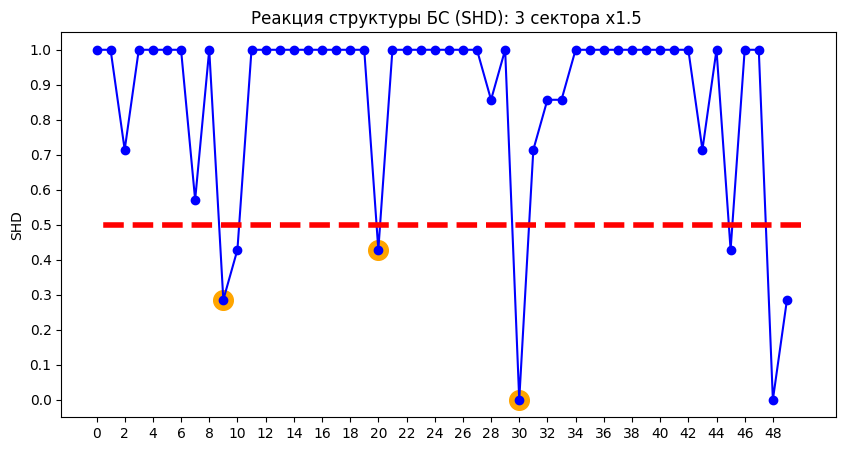

In [167]:
plt.plot(list_vse_shd3, 'o-b')
plt.plot([50,0],[0.5,0.5],linestyle='dashed', color='r', linewidth=4)
plt.ylabel('SHD')
plt.xticks(range(0,50,2))
plt.yticks(np.linspace(0, 1,11))
plt.title( "Реакция структуры БС (SHD): 3 сектора x1.5 " )

X = np.array([9,20,30])
Y = np.array([list_vse_shd3[X[0]],list_vse_shd3[X[1]],list_vse_shd3[X[2]]])

plt.scatter(X,Y,color="orange",s=200)

plt.show()

In [160]:
value_5, shd,list_vse_uzly5,list_vse_uzly_shd5 = experement5(df50, 0.3, 1.5, ['s9', 's20', 's30', 's40', 's5'])

72
2023-06-20 22:34:21,741 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [154]:
list_vse_shd5=shd_proc (list_vse_uzly_shd5)

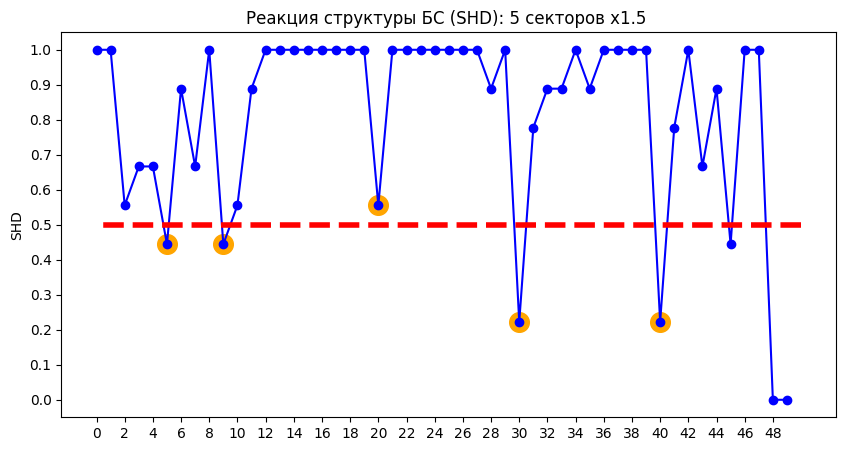

In [166]:
plt.plot(list_vse_shd5, 'o-b')
plt.plot([50,0],[0.5,0.5],linestyle='dashed', color='r', linewidth=4)
plt.ylabel('SHD')
plt.xticks(range(0,50,2))
plt.yticks(np.linspace(0, 1,11))
plt.title( "Реакция структуры БС (SHD): 5 секторов x1.5 " )

X = np.array([9,20,30,40,5])
Y = np.array([list_vse_shd5[X[0]],list_vse_shd5[X[1]],list_vse_shd5[X[2]],list_vse_shd5[X[3]],list_vse_shd5[X[4]]])

plt.scatter(X,Y,color="orange",s=200)

plt.show()

In [156]:
value_4, shd,list_vse_uzly4,list_vse_uzly_shd4 = experement5(df50, 0.3, 1.5, ['s9', 's20', 's30', 's40'])

72
2023-06-20 22:30:45,884 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [157]:
list_vse_shd4=shd_proc (list_vse_uzly_shd4)

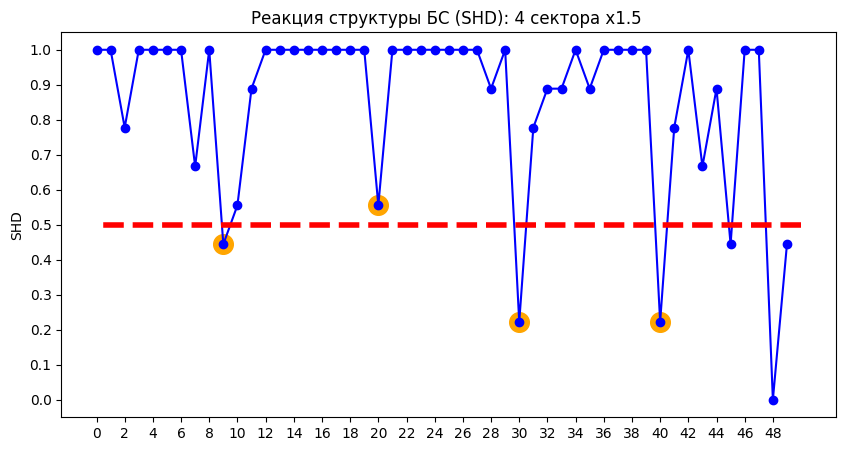

In [165]:
plt.plot(list_vse_shd4, 'o-b')
plt.plot([50,0],[0.5,0.5],linestyle='dashed', color='r', linewidth=4)
plt.ylabel('SHD')
plt.xticks(range(0,50,2))
plt.yticks(np.linspace(0, 1,11))
plt.title( "Реакция структуры БС (SHD): 4 сектора x1.5 " )

X = np.array([9,20,30,40])
Y = np.array([list_vse_shd4[X[0]],list_vse_shd4[X[1]],list_vse_shd4[X[2]],list_vse_shd4[X[3]]])

plt.scatter(X,Y,color="orange",s=200)

plt.show()

In [161]:
value10_5, shd10,list_vse_uzly105,list_vse_uzly_shd105 = experement5(df50, 0.3, 10, ['s9', 's20', 's30', 's40', 's5'])

72
2023-06-20 22:35:03,113 | INFO     | Preprocessors.py-scan-0091 | No one column is discrete


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [162]:
list_vse_shd105=shd_proc (list_vse_uzly_shd105)

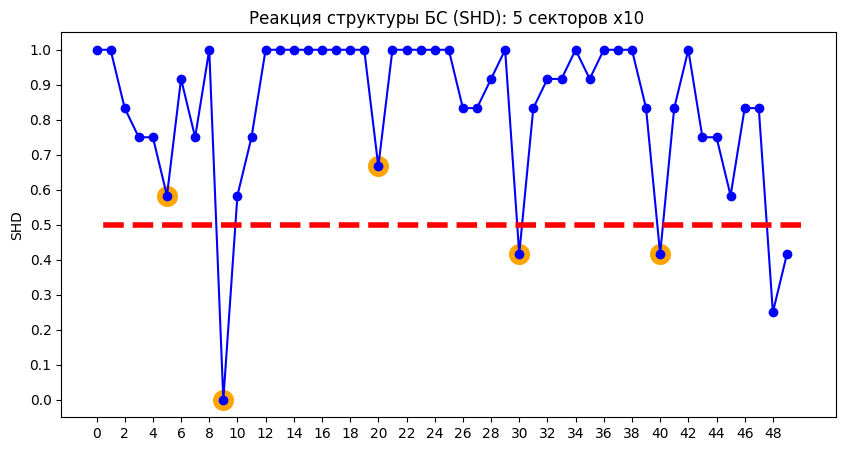

In [164]:
plt.plot(list_vse_shd105, 'o-b')
plt.plot([50,0],[0.5,0.5],linestyle='dashed', color='r', linewidth=4)
plt.ylabel('SHD')
plt.xticks(range(0,50,2))
plt.yticks(np.linspace(0, 1,11))
plt.title( "Реакция структуры БС (SHD): 5 секторов x10 " )

X = np.array([9,20,30,40,5])
Y = np.array([list_vse_shd105[X[0]],list_vse_shd105[X[1]],list_vse_shd105[X[2]],list_vse_shd105[X[3]],list_vse_shd105[X[4]]])

plt.scatter(X,Y,color="orange",s=200)

plt.show()